# Machine Learning Project
## Dhivya Murugesan

## Regression
Regression analysis is a powerful statistical method that allows you to examine the relationship between two or more variables of interest. While there are many types of regression analysis, at their core they all examine the influence of one or more independent variables on a dependent variable.

## GridSearch CV
In this project I'm using GridSearch technique to find the best model and best parameters to predict the snail's age.

## The Various Types of Regressors Used in this Project are:
 - LinearRegression
 - RandomForestRegressor
 - AdaBoostRegressor
 - SVR
 - KNeighborsRegressor


## Dataset 
### About
Abalone is common name for any group of small to very large sea snails, commonly found along the coasts across the world, and used as delicacy in cusinies and it's leftover shell is fashioned into jewelery due to it's iridescent luster. Due to it's demand and economic value it's often harvested in farms, and as such the need to predict the age of abalone from physical measurements. Traditional approach to determine it's age is by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.

### Data Description
Number of instances: 4177
Number of attributes: 9

- Independent Variables: Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, and Shell weight
- Target: Rings

Attribute Information:
Given below is attribute name, type, measurement, and brief description.

- Name----------------Data-Type-----Meas.------Description
-----                ---------     -----   -----------
- Sex-------------------nominal--------M, F, and I (infant)
- Length---------------continuous----mm----------Longest shell measurement
- Diameter------------continuous----mm---------perpendicular to length
- Height---------------continuous-----mm--------with meat in shell
- Whole weight------continuous-----grams-----whole abalone
- Shucked weight---continuous-----grams-----weight of meat
- Viscera weight-----continuous-----grams-----gut weight (after bleeding)
- Shell weight--------continuous-----grams-----after being dried
- Rings(TARGET)---integer-----------+1.5------gives the age in years

Missing Values: None

Dataset comes from UCI Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/Abalone


In [25]:
# The code was removed by Watson Studio for sharing.

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [2]:
#Analysing

dataset.describe()

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


## Converting Categorical Variables into Numeric Variables

In [3]:
# The feature 'Sex' has nominal values. Converting it into 0 for Male, 1 for Female, 2 for Infant
dataset.sex=dataset.sex.map(
        {
                'M':0,
                'F':1,
                'I':2
                })

In [4]:
#Normalisation.

from sklearn.preprocessing import StandardScaler
sc_df=StandardScaler()
df_Scaled=pd.DataFrame(sc_df.fit_transform(dataset), columns=dataset.columns)
df_Scaled

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,-1.154346,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.154346,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.053798,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-1.154346,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,1.261943,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
5,1.261943,-0.824395,-1.087206,-1.064424,-0.973307,-0.983919,-0.940625,-0.853756,-0.599818
6,0.053798,0.050033,0.071741,0.250672,-0.104505,-0.551363,-0.356690,0.655017,3.122516
7,0.053798,0.174951,0.172519,-0.347099,-0.123880,-0.294533,-0.283698,0.152092,1.881738
8,-1.154346,-0.408000,-0.381760,-0.347099,-0.651076,-0.643732,-0.621286,-0.530447,-0.289624
9,0.053798,0.216591,0.323686,0.250672,0.134109,-0.202164,-0.270012,0.583170,2.812322


## Correlation between the variables

In [5]:
#Correlation between the variables
df_Scaled.corr()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole-weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked-weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera-weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell-weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


The "shell-weight" attribute is highly correlated with the target "rings".

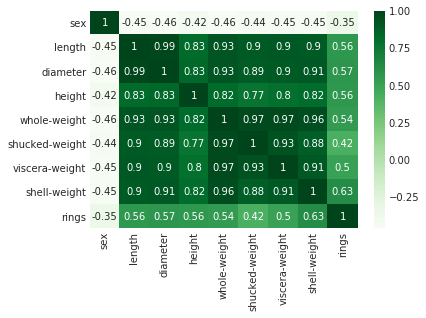

In [6]:
#Correlation between the variables using Heatmap
import seaborn as sns
sns.set_style("whitegrid")
sns.heatmap(df_Scaled.corr(), xticklabels=df_Scaled.columns, yticklabels=df_Scaled.columns,
            linecolor="black",annot=True, cmap='Greens', square=False)


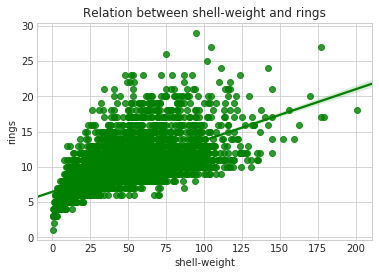

In [27]:
import seaborn as sns
sns.regplot(x='shell-weight', y='rings', data=dataset, color='green')
plt.xlabel("shell-weight")
plt.ylabel("rings")
plt.title("Relation between shell-weight and rings")
plt.show()

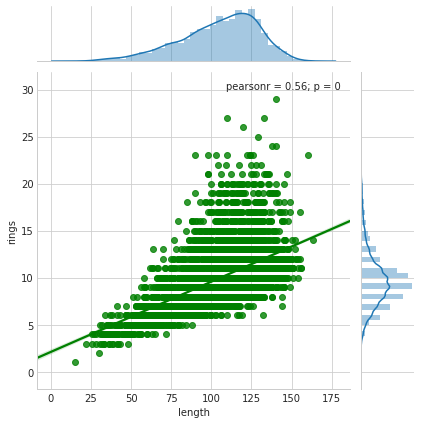

In [30]:
sns.jointplot(x="length", y="rings", data=dataset, kind='reg', joint_kws={'color':'green'})

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


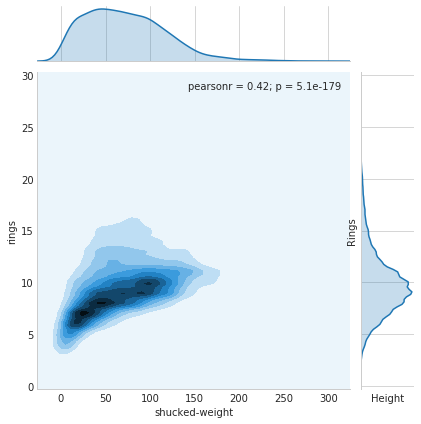

In [33]:
sns.jointplot(x="shucked-weight", y="rings", data=dataset, kind='kde', joint_kws={'color':'green'})
#plt.title("Relation between Area and Price")
plt.xlabel("Height")
plt.ylabel("Rings")
plt.show()

### The Target Variable "Rings" is highly correlated with the "Shell-Weight", then the diameter, length, height and the target variable is negatively correlated (Weakly) with Sex.

In [7]:
#Splitting the independent and target variables from the dataset.
X=df_Scaled.drop(["rings"], axis=1)
y=df_Scaled.rings
print(X)

           sex    length  diameter    height  whole-weight  shucked-weight  \
0    -1.154346 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1    -1.154346 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2     0.053798  0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3    -1.154346 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4     1.261943 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   
5     1.261943 -0.824395 -1.087206 -1.064424     -0.973307       -0.983919   
6     0.053798  0.050033  0.071741  0.250672     -0.104505       -0.551363   
7     0.053798  0.174951  0.172519 -0.347099     -0.123880       -0.294533   
8    -1.154346 -0.408000 -0.381760 -0.347099     -0.651076       -0.643732   
9     0.053798  0.216591  0.323686  0.250672      0.134109       -0.202164   
10    0.053798  0.008394 -0.280982  0.011563     -0.453250       -0.745112   
11   -1.154346 -0.782755 -0.583316 -0.705762     -0.862158      

In [8]:
print(y)

0       1.571544
1      -0.910013
2      -0.289624
3       0.020571
4      -0.910013
5      -0.599818
6       3.122516
7       1.881738
8      -0.289624
9       2.812322
10      1.261349
11      0.020571
12      0.330765
13      0.020571
14      0.020571
15      0.640960
16     -0.910013
17      0.020571
18     -0.910013
19     -0.289624
20      0.330765
21      0.020571
22      0.640960
23     -0.289624
24      0.020571
25      0.330765
26      0.330765
27      0.640960
28      1.571544
29      0.330765
          ...   
4147    0.330765
4148    0.330765
4149   -1.220208
4150   -0.910013
4151   -1.220208
4152   -0.910013
4153   -0.599818
4154   -1.220208
4155   -1.220208
4156   -0.599818
4157   -0.599818
4158   -0.599818
4159   -0.289624
4160    0.330765
4161    0.330765
4162   -0.599818
4163   -0.910013
4164   -0.910013
4165   -0.910013
4166    0.020571
4167   -0.289624
4168   -0.599818
4169    0.020571
4170    0.020571
4171   -0.599818
4172    0.330765
4173    0.020571
4174   -0.2896

In [9]:
# Using OLS summary to find my p-values. Finding summary with all the variables.

import statsmodels.api as sm
X2=sm.add_constant(X)
ols=sm.OLS(y,X2)
lr=ols.fit()
print(lr.summary())


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  rings   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     600.3
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:12:51   Log-Likelihood:                -4326.2
No. Observations:                4177   AIC:                             8670.
Df Residuals:                    4168   BIC:                             8727.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.168e-16      0.011   2.05e

## The P-Value for the attribute 'length' is very high. So will run Recursive Feature Elimination, to see if 'length' is getting removed, or else will follow other ways to drop the attribute from our dataset.

In [10]:
#Importing all the models for Regression

#Model1= Linear Regression
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

#Model2 - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()

#Model3 - AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
model3=AdaBoostRegressor() #base_estimator=DecisionTreeRegressor)

#Model4 - SVR
from sklearn.svm import SVR
model4=SVR()#kernel='rbf')

#Model5 - KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
model5=KNeighborsRegressor()

#Model6 - SGD Regressor

from sklearn.linear_model import SGDRegressor
model6=SGDRegressor()#using default loss function 'squared_loss', which refers to ols fit

#Model7 - SVR
from sklearn.linear_model import SGDRegressor
model7=SGDRegressor(loss='epsilon_insensitive')#SVR


## Recursive Feature Elimination

In [11]:
#Recursive Feature Elimination

list_r2=[]
list_adj_r2=[]
max_r2=0

from sklearn.feature_selection import RFE
for i in range(1, len(X.iloc[0])+1):
    selector=RFE(model1, i, step=1)
    selector=selector.fit(X,y)
    r2=selector.score(X,y)
    Adj_r2=1-(len(X)-1)/(len(X)-i-1)*(1-r2)
    list_adj_r2.append(Adj_r2)
    list_r2.append(r2)
    if max_r2<Adj_r2:
        sel_features=selector.support_
        max_r2=Adj_r2
        
X_sub=X.iloc[:,sel_features]
X_sub.describe()

,sex,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-7.340709e-16,-7.335924e-18,3.788101e-16,5.167042e-17,1.112084e-16,-8.314047e-17,1.337477e-16
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-1.154346e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00
25%,-1.154346e+00,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01
50%,5.379815e-02,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02
75%,1.261943e+00,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01
max,1.261943e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00


## RFE removed the Lenght attribute. Now lets run OLS on this new X_sub

In [12]:
import statsmodels.api as sm
X2=sm.add_constant(X_sub)
ols=sm.OLS(y,X2)
lr=ols.fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  rings   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     686.1
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:18:53   Log-Likelihood:                -4326.3
No. Observations:                4177   AIC:                             8669.
Df Residuals:                    4169   BIC:                             8719.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.168e-16      0.011   2.05e

## Removing the Length attribute didn't make any significant changes to my R-Squared and Adj. R-Squared

In [13]:
#Splitting my Train and Test data. Here i'm going to input the GridSearchCV model with my Training data 
#and I'll find the model scores on the Testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.25, random_state=0)


### Feeding a list of regression models with a wide range of respective parameter values into GridSearchCV. Created a GridsearchCV model with cv=5, ie., number of folds to be created on my data. GridsearchCV will fit these models one by one on X_train and predict the best parameters that yield to higher model score.

In [20]:
models = {
    'model1': LinearRegression(),
    'model2': RandomForestRegressor(),
    'model3': AdaBoostRegressor(),
    'model4': SVR(),
    'model5': KNeighborsRegressor()

}

params = {
    'model1':{ 
            'fit_intercept': ['True']
            },
    'model2': {
            "n_estimators"      : range(5,15),
            "criterion": ['mse', 'mae']
            },
    'model3': {
            'n_estimators':range(5,15)
            },
    'model4': {
            'kernel':['linear','rbf','poly'],
            'degree':range(3,7)
            },
    'model5': {
            'n_neighbors': range(3,6),
            'weights': ['uniform', 'distance']
            }
}

from sklearn.metrics import recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
print("\033[1;30;42m ----------------------------------RESULT----------------------------------- \033[0m")
for name in models.keys():
    est = models[name]
    est_params = params[name]
    gscv = GridSearchCV(est, est_params, cv=5)
    gscv.fit(X_train, y_train)
    y_pred=gscv.predict(X_test)
    Biased_MSE=mean_squared_error(y_pred,y_test)
    Unbiased_MSE=Biased_MSE*(4177/(4177-8-1))
    #Recall=recall_score(y_test,y_pred, average='macro')
    #Precision=precision_score(y_test,y_pred, average='macro')
    #Classification_Report=classification_report(y_test,y_pred)
    print("--------------------------------------------------------------------")
    print("Best estimaters for", models[name], "is",(gscv.best_estimator_))
    print("Best parameters for", models[name], "is",(gscv.best_params_))
    print("\033[1;30;42m Best score for", models[name], "is",(gscv.best_score_),"\033[0m")
    print("\033[1;30;42m Unbiased MSE of the", models[name],"is",Unbiased_MSE,"\033[0m")
    #print("\033[1;30;42m Macro Recall Score of the", models[name],"is",Recall,"\033[0m")
    #print("\033[1;30;42m Macro Precision of the", models[name],"is",Precision,"\033[0m")
    #print("\033[1;30;42m Classification Report of the", models[name],"is",Classification_Report,"\033[0m")
    
    print("--------------------------------------------------------------------")

 ----------------------------------RESULT----------------------------------- 
--------------------------------------------------------------------
Best estimaters for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is LinearRegression(copy_X=True, fit_intercept='True', n_jobs=1, normalize=False)
Best parameters for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is {'fit_intercept': 'True'}
 Best score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is 0.523395167665 
 Unbiased MSE of the LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is 0.464548558514 
--------------------------------------------------------------------
--------------------------------------------------------------------
Best estimaters for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is SVR(C=1.0, c

### Best Scores of various models

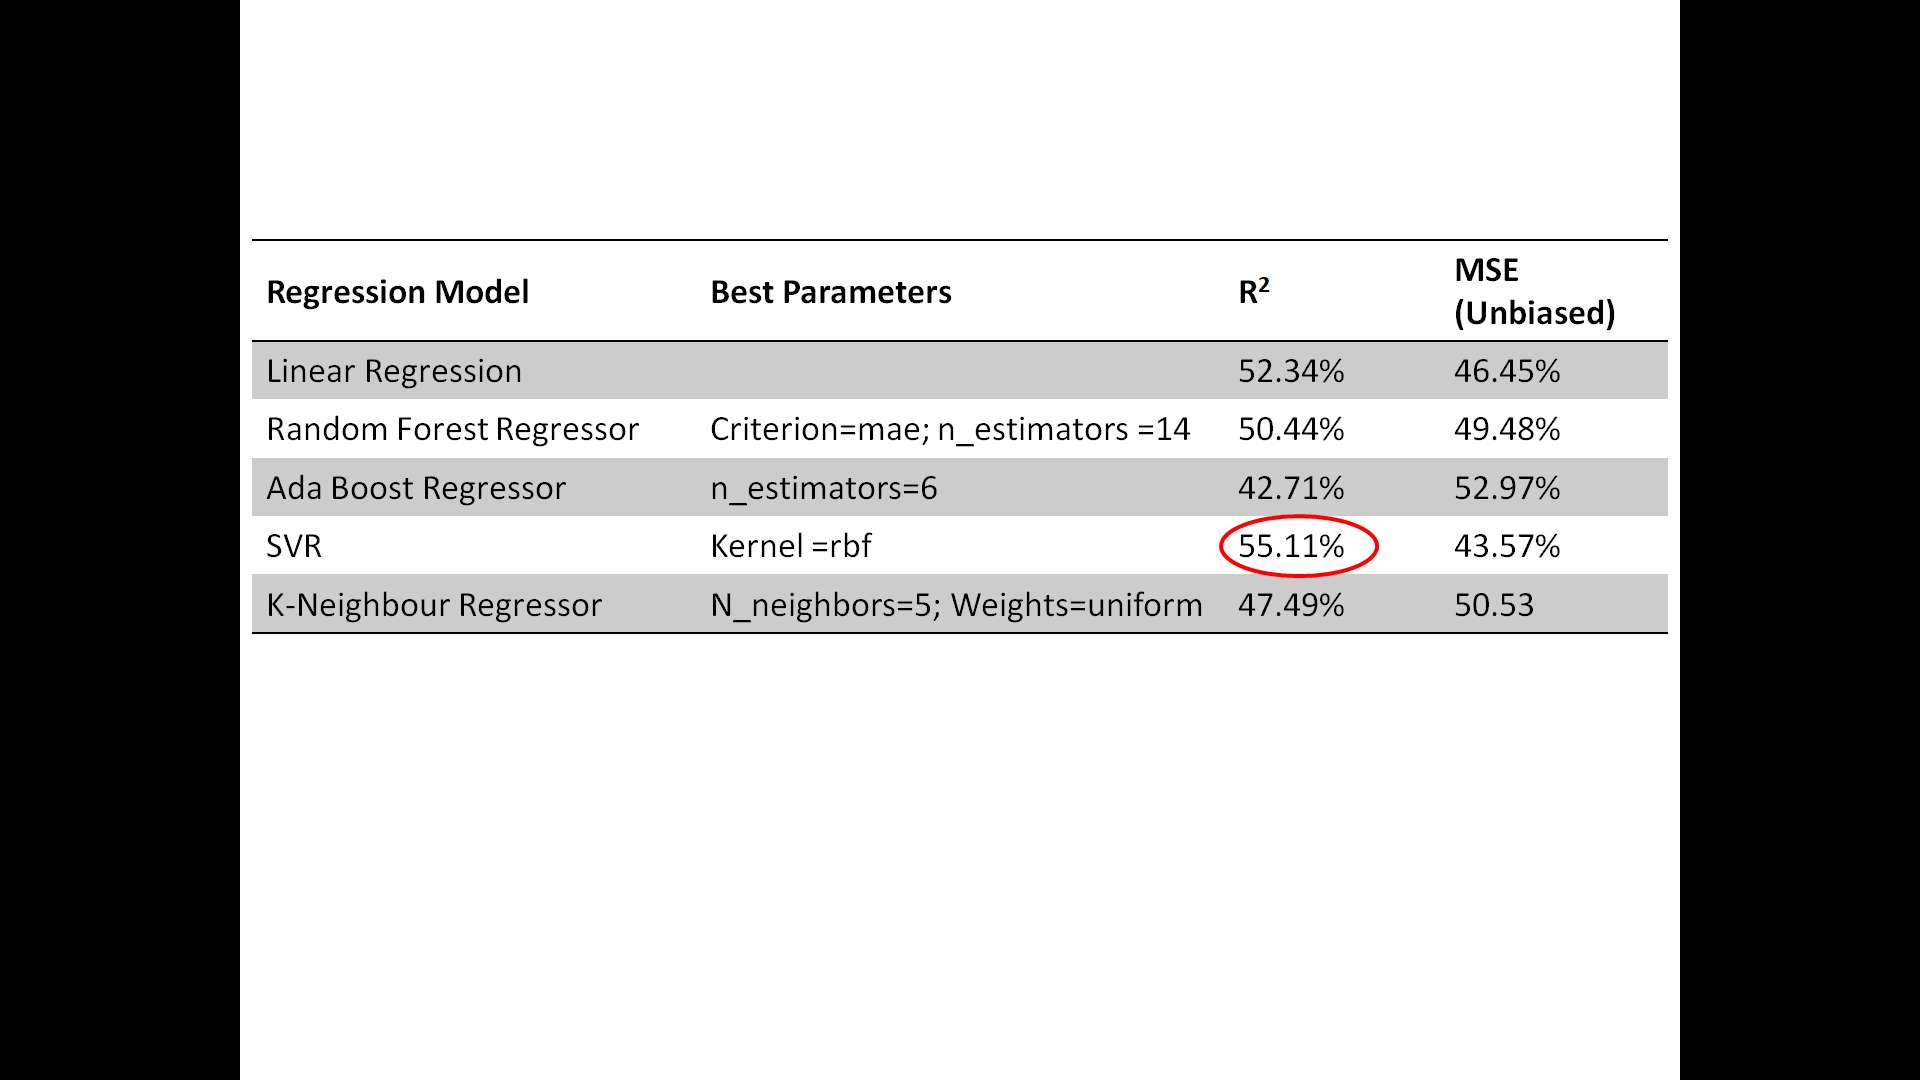

# Conclusion

# The best model for the dataset is SVR (Radial Basis Function (RBF)) which predicts the age of snail with the regression score of 55.11%.